### 輸入股票代碼，回傳股票資料

In [8]:
%matplotlib inline

import io
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+186400 #用datatime讓period2到現在
    site = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=1549258000&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"

    response = requests.post(site)

    f = io.StringIO(response.text)
    df = pd.read_csv(f, index_col='Date', parse_dates=['Date'] )
    df = df.drop('Volume', axis = 1)
    
    ma_list = [5, 10, 20]
    for ma in ma_list:
        df['MA_' + str(ma)] = df['Adj Close'].rolling(ma).mean()
    
    return df

In [15]:
ham = input('請輸入想搜尋的股票代碼：')

請輸入想搜尋的股票代碼：4958


台股 4958


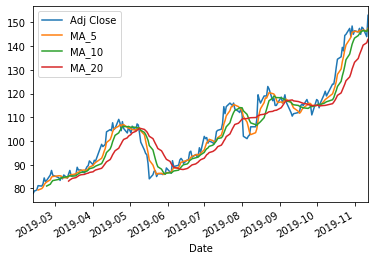

In [18]:
df = crawl_price(str(ham) + '.TW')
stock = '台股 ' + str(ham)
print(stock)
df.iloc[:, 4: 8].plot();